In [30]:
import pandas as pd 
import numpy as np

df = pd.read_json('all_aps.json')
df = df[df['size'] >=5]

In [31]:
df

,price,regionName,address,rooms,parking,toilets,size,penthouse,iptuPlusCondominium
0,3500,Santa Helena (Barreiro),Rua Maria Amélia Mello,3,2,3,160,1,850
1,1600,Pousada Santo Antônio,Rua Ernesto Tognolo,2,1,1,87,1,459
2,4500,Sion,Avenida dos Bandeirantes,3,3,3,220,1,1235
3,4500,União,Rua Domingos Fernandes,5,2,4,330,1,875
4,3800,Santo Antônio,,1,2,2,80,1,312
...,...,...,...,...,...,...,...,...,...
6379,2800,Serra,"Rua do Ouro, 400",1,1,1,90,0,364
6380,2000,Buritis,"Rua Juruena, 135",2,1,1,40,0,320
6381,3000,Cruzeiro,Rua Muzambinho,2,1,1,64,0,250
6382,4200,Buritis,"Rua Ernani Agricola, 475",3,4,3,115,0,1388


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'parking'}>],
       [<Axes: title={'center': 'toilets'}>,
        <Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'penthouse'}>],
       [<Axes: title={'center': 'iptuPlusCondominium'}>, <Axes: >,
        <Axes: >]], dtype=object)

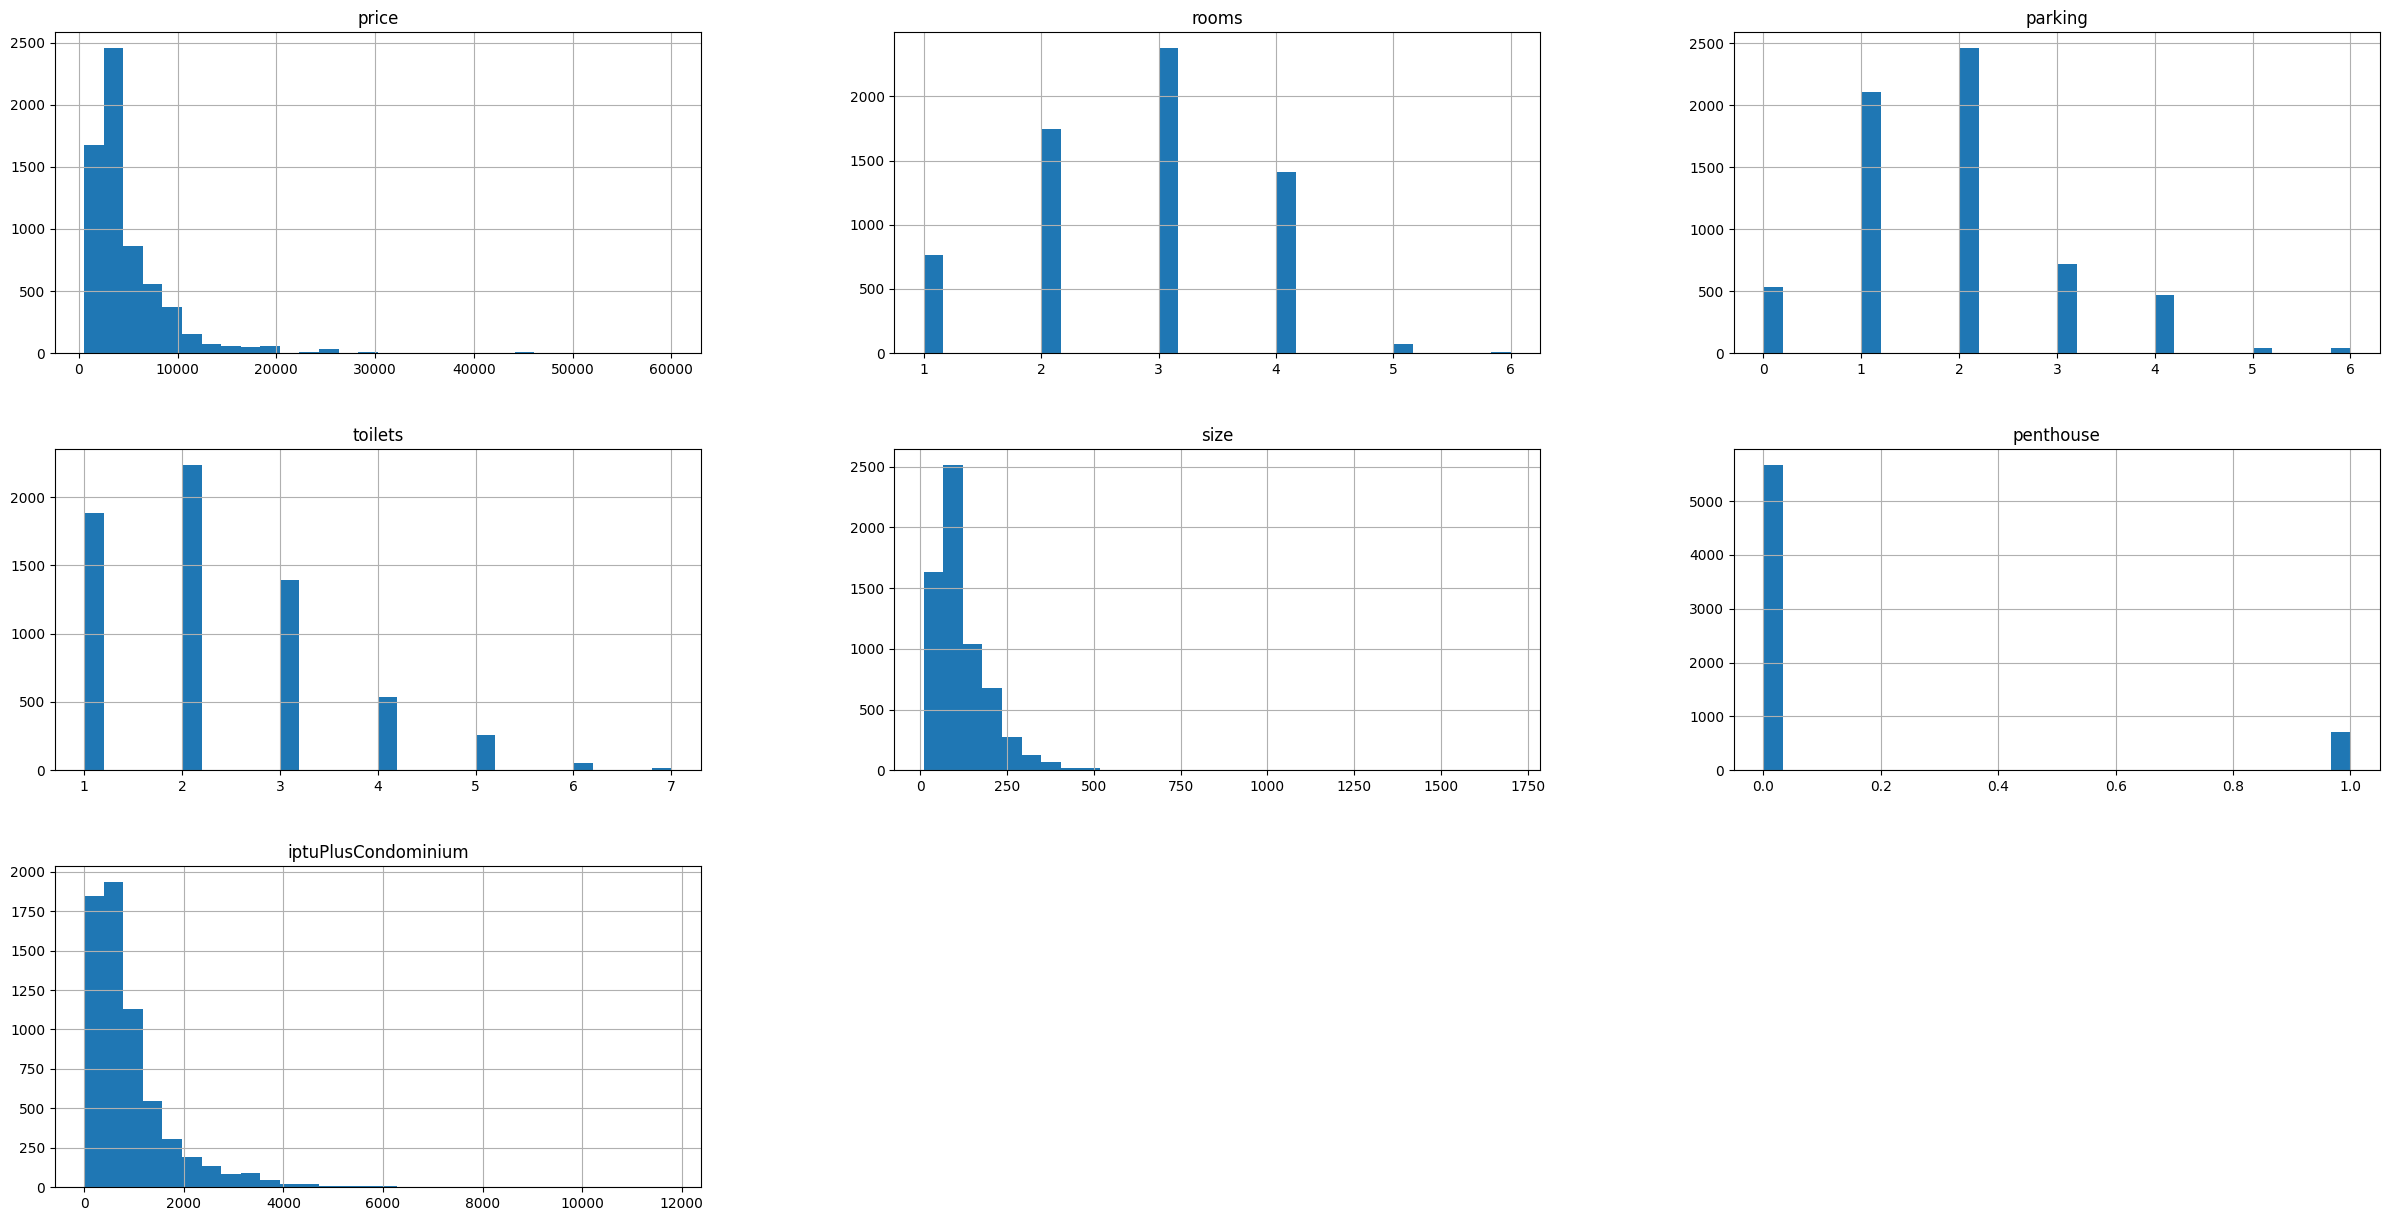

In [32]:
df_num = df.drop(columns=['regionName','address'])
df_num.hist(bins=30, figsize=(30,15))

In [33]:
df_num.corr()

,price,rooms,parking,toilets,size,penthouse,iptuPlusCondominium
price,1.000000,0.451580,0.683497,0.644366,0.645972,0.182906,0.686911
rooms,0.451580,1.000000,0.576057,0.650024,0.652213,0.178334,0.393880
parking,0.683497,0.576057,1.000000,0.681859,0.636908,0.246489,0.586930
toilets,0.644366,0.650024,0.681859,1.000000,0.675813,0.271245,0.577182
size,0.645972,0.652213,0.636908,0.675813,1.000000,0.360436,0.554728
penthouse,0.182906,0.178334,0.246489,0.271245,0.360436,1.000000,0.017620
iptuPlusCondominium,0.686911,0.393880,0.586930,0.577182,0.554728,0.017620,1.000000


In [34]:
import sklearn
from sklearn.preprocessing import OneHotEncoder 
hot_encoder = OneHotEncoder()

cat_1hot = hot_encoder.fit_transform(df[['address']])
cat_2hot = hot_encoder.fit_transform(df[['regionName']])

In [35]:
one_hot = pd.get_dummies(df['address'], dtype= int)

df1 = df.drop(columns= ['address'])
df1 = df1.join(one_hot)

one_hot2 = pd.get_dummies(df['regionName'], dtype= int)
df_model = df1.drop(columns= ['regionName'])
df_model = df_model.join(one_hot2)

In [36]:
df_model

,price,rooms,parking,toilets,size,penthouse,iptuPlusCondominium,,Rua Dr Helvécio Arantes,Alameda Guilherme Henrique Daniel,...,União,Venda Nova,Vila Cloris,Vila Clóris,Vila Oeste,Vila Paris,Vista Alegre,Vitória,Átila de Paiva,Átila de Paiva (Barreiro)
0,3500,3,2,3,160,1,850,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1600,2,1,1,87,1,459,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4500,3,3,3,220,1,1235,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4500,5,2,4,330,1,875,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3800,1,2,2,80,1,312,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,2800,1,1,1,90,0,364,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6380,2000,2,1,1,40,0,320,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6381,3000,2,1,1,64,0,250,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6382,4200,3,4,3,115,0,1388,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error 


In [90]:
Y = df_model['price']
X = df_model.loc[ : , df_model.columns != 'price']
x_train , x_test , y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [91]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# Convertendo os dados escalonados de volta para DataFrame para manter os nomes das features
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)
'''

In [86]:
# Linear Regression
'''
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)   # Vai usar a função custo para otimizar o modelo 
'''

LinearRegression()

In [87]:
# Calculando o erro do modelo
'''
preds = lin_reg.predict(x_train_scaled)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse
'''

np.float64(2157.0132797329707)

In [88]:
'''
scores = cross_val_score(lin_reg, x_train_scaled, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)
'''

Scores: [9.56549903e+17 1.05841278e+18 1.04978063e+18 1.19948850e+18
 1.21491452e+18 1.00127626e+18 1.03222410e+18 1.08557664e+18
 9.91693684e+17 8.82549781e+17]
Mean: 1.0472466791208438e+18
Standard deviation: 9.678141894528059e+16


In [47]:
# DecisionTree Regressor 
'''
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)
'''

DecisionTreeRegressor()

In [48]:
'''
preds_tree = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds_tree)

tree_rmse = np.sqrt(tree_mse)
tree_rmse
'''

np.float64(109.21682400107652)

In [49]:

'''
scores = cross_val_score(tree_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('STD:', scores.std())

display(tree_rmse_scores)
'''

Scores: [1986.68006104 1807.05178148 2281.95540389 2354.85290202 1633.2465452
 2203.86118304 1908.09686816 2557.53198199 1989.02757383 1991.51269601]
Mean: 2071.381699665685
STD: 262.1870326309496


In [99]:
from sklearn.ensemble import RandomForestRegressor


rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [100]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

np.float64(631.7497608503215)

In [125]:
scores = cross_val_score(rf_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_rmse_scores)

Scores: [1921.31261572 2229.54963217 1310.46766732 1875.4364951  1478.95632332
 1820.46683634 1869.00094096 1566.4525238  1535.11918939 1417.8655427 ]
Mean: 1702.4627766827264
Standard deviation: 269.89056707137144


In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [102]:
final_model = grid_search.best_estimator_

In [104]:
scores = cross_val_score(final_model, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_rmse_scores)

Scores: [2201.85209087 1647.9512325  1332.82745807 2081.00770915 1517.55216567
 1807.191168   1660.15953192 1471.15274724 1517.30782991 1477.79921155]
Mean: 1671.4801144890575
Standard deviation: 266.0636038106178


In [110]:
final_model_predictions_train = final_model.predict(x_train)
final_model_predictions_test = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_predictions_test)
print(np.sqrt(final_mse))

1801.6577514527864


In [111]:
import plotly.graph_objects as go
fig = go.Figure(data= [go.Scatter(y=y_test.values), 
                       go.Scatter(y=final_model_predictions_test)])
fig.show()

In [116]:
df.loc[x_train.index, 'predict'] = final_model_predictions_train
df.loc[x_train.index, 'type predict'] = 'train'

df.loc[x_test.index, 'predict'] = final_model_predictions_test
df.loc[x_test.index, 'type predict'] = 'test'

In [124]:
df

,price,regionName,address,rooms,parking,toilets,size,penthouse,iptuPlusCondominium,predict,type predict
0,3500,Santa Helena (Barreiro),Rua Maria Amélia Mello,3,2,3,160,1,850,4052.100000,test
1,1600,Pousada Santo Antônio,Rua Ernesto Tognolo,2,1,1,87,1,459,1686.666667,train
2,4500,Sion,Avenida dos Bandeirantes,3,3,3,220,1,1235,6270.500000,train
3,4500,União,Rua Domingos Fernandes,5,2,4,330,1,875,5475.333333,test
4,3800,Santo Antônio,,1,2,2,80,1,312,3778.233333,train
...,...,...,...,...,...,...,...,...,...,...,...
6379,2800,Serra,"Rua do Ouro, 400",1,1,1,90,0,364,3133.933333,test
6380,2000,Buritis,"Rua Juruena, 135",2,1,1,40,0,320,2125.566667,train
6381,3000,Cruzeiro,Rua Muzambinho,2,1,1,64,0,250,3115.000000,train
6382,4200,Buritis,"Rua Ernani Agricola, 475",3,4,3,115,0,1388,4314.333333,train


In [123]:
df.to_json('aps_previsoes.json', orient='records', force_ascii=False, indent=4)